In [2]:
import pandas as pd
import json
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pylab as plt

In [3]:
df_abstract = pd.read_csv('distance_bert_dim_abstract.csv', index_col=0)
df_title = pd.read_csv('distance_bert_dim_title.csv', index_col=0)
with open('dim_sample.json') as f:
    all_data = json.load(f)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# create a dataframe with row indices as project ids and column indices as publication ids
# if publication is in project, then 1, else 0
# if publication date is before project start date, then 0, else 1
# ratio of intersection of organisations from project and publication to organisations from publication
# ratio of intersection of authors from project and publication to authors from publication

pub_data = {}
for pro_id in all_data.keys():
    for pub_id in all_data[pro_id]['publications'].keys():
        pub_data[pub_id] = all_data[pro_id]['publications'][pub_id]

data_matrix = [[0.] * len(pub_data) for _ in range(len(all_data))]
for i, pro_id in enumerate(all_data.keys()):
    for j, pub_id in enumerate(pub_data.keys()):
        belongs = 1 if pub_id in all_data[pro_id]['publications'].keys() else 0
        abs_distance = df_abstract.at[int(pro_id), pub_id]
        title_distance = df_title.at[int(pro_id), pub_id]
        try:
            dis_ratio = len(set(all_data[pro_id]['disciplines']).intersection(set(pub_data[pub_id]['disciplines'])))/len(pub_data[pub_id]['disciplines'])
        except:
            dis_ratio = 0
        data_matrix[i][j] = [belongs, abs_distance, title_distance, dis_ratio]

df = pd.DataFrame(data_matrix, index=all_data.keys(), columns=[pub[0] for pub in pub_data])
df.to_csv('xgb_data_dim.csv')
df.head()

,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9852805,"[1, 0.262665670768895, 0.1830403200438336, 1.0]","[0, 0.4410820025067695, 1.0, 0.0]","[0, 0.8205592821545781, 1.0, 0]","[0, 0.4788488390614064, 1.0, 0.0]","[0, 0.5040967155933606, 1.0, 0.0]","[0, 0.7228735567510223, 1.0, 0.0]","[0, 0.7137638773815461, 0.5785581347061215, 0.0]","[0, 0.4198679898051862, 1.0, 0.0]","[0, 0.0806667206208264, 0.0020026694360484, 0.0]","[0, 0.6542890520560082, 1.0, 0.0]","[0, 0.1531345590267617, 1.0, 0.0]","[0, 0.7011822515689794, 1.0, 0.0]","[0, 0.4529253893473168, 1.0, 0.0]","[0, 0.0736096563765452, 1.0, 0.0]","[0, 0.6143702985387933, 0.0, 0.0]","[0, 0.6497573923780308, 0.0059317243065077, 0.0]","[0, 0.5376574851977287, 0.0317213396014809, 0.0]","[0, 0.5777754689544876, 0.041795203799928, 0.0]","[0, 0.7823874666223005, 1.0, 0.0]","[0, 0.7760786902638853, 1.0, 0.0]","[0, 0.641857921235647, 0.0, 0.0]","[0, 0.7672103191278931, 1.0, 1.0]","[0, 0.6059691793188139, 1.0, 0.0]","[0, 0.7707694419088118, 1.0, 1.0]","[0, 0.7026749298174735, 0.0, 0.0]","[0, 0.8773399683644975, 1.0, 0.0]","[0, 0.8913097775574494, 0.1891337666431586, 0.0]","[0, 0.9165022599680664, 0.0, 0.0]","[0, 0.9893826400267778, 0.0, 0.0]","[0, 0.7541677334816567, 1.0, 0.0]","[0, 0.6430462189963719, 1.0, 0.0]","[0, 0.60529967533882, 1.0, 0.0]","[0, 0.7894946004735172, 1.0, 0.0]","[0, 0.7095213034444618, 1.0, 0]","[0, 0.7109669142149502, 1.0, 0.0]","[0, 0.714062361453252, 1.0, 0.0]","[0, 0.7767971271859225, 1.0, 0.0]","[0, 0.7156708807121441, 1.0, 0.0]","[0, 0.6752831124892982, 1.0, 0.0]","[0, 0.6508862384673069, 1.0, 0.0]","[0, 0.8112365894467979, 1.0, 0.0]","[0, 0.8319828165897001, 1.0, 0.0]","[0, 0.7870477687572248, 1.0, 0.0]","[0, 0.8243785778263497, 1.0, 0.0]","[0, 0.8503389471081083, 1.0, 0.0]","[0, 0.8381636680129567, 1.0, 0.0]","[0, 0.8153917105552602, 1.0, 0.0]","[0, 0.778222736368493, 0.8622984396815067, 0.0]","[0, 0.6078147154727352, 1.0, 0.0]","[0, 0.8274891535069498, 1.0, 0.0]","[0, 0.5753070549328635, 1.0, 0.0]","[0, 0.5043366398061132, 1.0, 0.0]","[0, 0.4757716612488806, 1.0, 0.0]","[0, 0.3557664631849587, 1.0, 0.0]","[0, 0.4671551246405341, 1.0, 0.0]","[0, 0.7390697284713468, 1.0, 0.0]","[0, 0.508183345184161, 1.0, 0.0]","[0, 0.6508844082049059, 1.0, 0.0]","[0, 0.787171697598158, 1.0, 0.0]","[0, 0.7679813223640439, 0.8397936971411429, 0.0]","[0, 0.8188860540681091, 1.0, 0.0]","[0, 0.4334497779729103, 1.0, 0.0]","[0, 0.5610213826486066, 1.0, 0.0]","[0, 0.6123628724759869, 1.0, 0.0]","[0, 0.620161639072305, 0.4117795592863664, 0.0]","[0, 0.6475919462954385, 0.0, 0]","[0, 0.6627600559989029, 1.0, 0.0]","[0, 0.9657148245301144, 1.0, 0.0]","[0, 0.6412700791004136, 1.0, 0.0]","[0, 0.6785402129929904, 1.0, 0.0]","[0, 0.7206684225013003, 1.0, 0.0]","[0, 0.5495661169502808, 1.0, 0

(225, 635, 4)
(142875, 4)
[0]	test-logloss:0.59987
[100]	test-logloss:0.02298
[200]	test-logloss:0.02365
[285]	test-logloss:0.02391
0.6589147286821705
0.6589147286821705
0.6434108527131783
0.6356589147286822
0.5813953488372093
0.5426356589147286
0.49612403100775193
0.43410852713178294
0.3643410852713178
0.20930232558139536


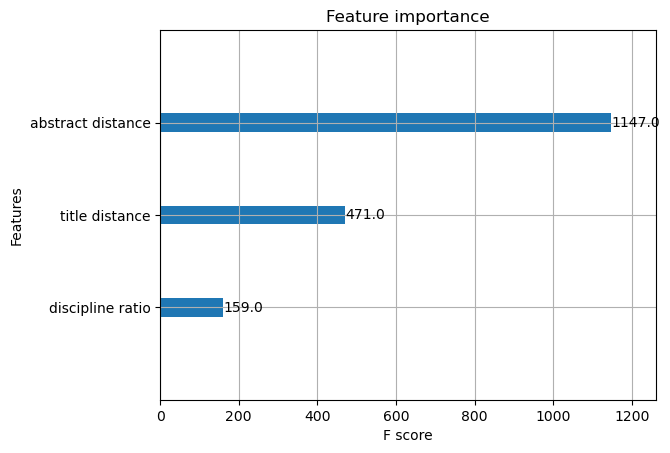

In [5]:
gb_raw_shape = (df.shape[0], df.shape[1], len(df.iloc[0, 0]))
print(gb_raw_shape)

gb_data = []
for i in range(len(list(df))):
    gb_data.extend(df.iloc[:, i].values.tolist())
gb_data = np.array(gb_data)
print(gb_data.shape)

project_numbers = np.array(list(range(1, gb_raw_shape[0] + 1)) * gb_raw_shape[1])

X = gb_data[:, 1:]
y = gb_data[:, 0]

train_pro_len = 180
train_pub_len = 506
split = train_pub_len * gb_raw_shape[0]
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['abstract distance', 'title distance', 'discipline ratio']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=200, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        p_numbers = list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1]
        filtered_p_numbers = [p for p in p_numbers if p in list(range(train_pro_len + 1, gb_raw_shape[0] + 1))]
        project_numbers_pred.append(filtered_p_numbers[:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[train_pub_len:]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

(225, 635, 4)
(142875, 4)
[0]	test-logloss:0.60007
[100]	test-logloss:0.02701
[200]	test-logloss:0.02758
[278]	test-logloss:0.02787
0.49612403100775193
0.4496124031007752
0.43410852713178294
0.40310077519379844
0.37209302325581395
0.3333333333333333
0.2868217054263566
0.20930232558139536
0.14728682170542637
0.07751937984496124


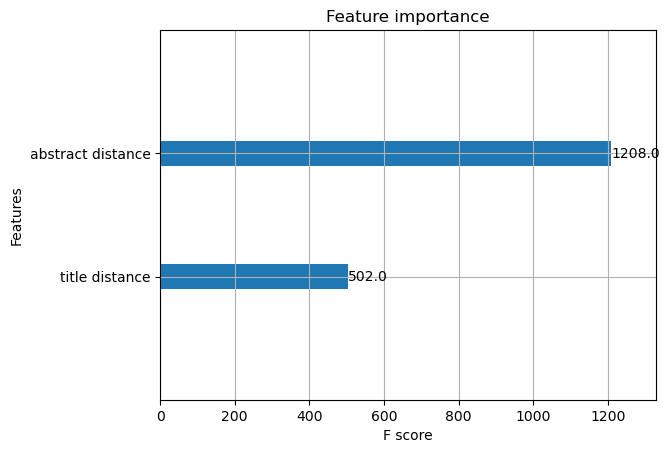

In [6]:
# drop discipline column
gb_raw_shape = (df.shape[0], df.shape[1], len(df.iloc[0, 0]))
print(gb_raw_shape)

gb_data = []
for i in range(len(list(df))):
    gb_data.extend(df.iloc[:, i].values.tolist())
gb_data = np.array(gb_data)
print(gb_data.shape)

project_numbers = np.array(list(range(1, gb_raw_shape[0] + 1)) * gb_raw_shape[1])
# gb_data = np.hstack((gb_data, project_numbers))
# gb_data

X = gb_data[:, 1:3]
y = gb_data[:, 0]

train_pro_len = 180
train_pub_len = 506
split = train_pub_len * gb_raw_shape[0]
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['abstract distance', 'title distance']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=200, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        p_numbers = list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1]
        filtered_p_numbers = [p for p in p_numbers if p in list(range(train_pro_len + 1, gb_raw_shape[0] + 1))]
        project_numbers_pred.append(filtered_p_numbers[:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[train_pub_len:]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

In [8]:
# support vector machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

gb_raw_shape = (df.shape[0], df.shape[1], len(df.iloc[0, 0]))
print(gb_raw_shape)

gb_data = []
for i in range(len(list(df))):
    gb_data.extend(df.iloc[:, i].values.tolist())
gb_data = np.array(gb_data)
print(gb_data.shape)

project_numbers = np.array(list(range(1, gb_raw_shape[0] + 1)) * gb_raw_shape[1])

X = gb_data[:, 1:]
y = gb_data[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

param_grid = {'C': [100],  
              'gamma': [0.1], 
              'kernel': ['rbf']}
svc = SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)
print(clf.best_params_)

# make prediction
y_pred = clf.predict(X_test)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[train_pub_len:]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

(225, 635, 4)
(142875, 4)
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
